**Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import time
from sklearn import metrics
from imblearn.metrics import specificity_score, sensitivity_score

**Read Dataset**

In [2]:
df = pd.read_csv('Dataset_Min_Max.csv')

**Display 5 Samples**

In [3]:
df.head(5)

,Unnamed: 0,File,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,...,Image,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability,Var3EdgeProbability
0,0,bacterial_leaf_blight (1).bmp,0.147371,0.471202,0.894205,0.871268,0.846115,0.891990,0.878584,0.288803,...,bacterial_leaf_blight (1).bmp,0.291474,0.000517,0.000503,0.000522,0.000488,0.546963,0.546937,0.553215,0.431016
1,1,bacterial_leaf_blight (2).bmp,0.139568,0.622872,0.878506,0.749458,0.740327,0.691668,0.673275,0.531231,...,bacterial_leaf_blight (2).bmp,0.270309,0.000444,0.000410,0.000426,0.000399,0.538093,0.538086,0.545271,0.431016
2,2,bacterial_leaf_blight (3).bmp,0.144109,0.557113,0.843893,0.740959,0.761691,0.716523,0.712658,0.385405,...,bacterial_leaf_blight (3).bmp,0.260842,0.000429,0.000428,0.000440,0.000418,0.571981,0.571986,0.584627,0.431016
3,3,bacterial_leaf_blight (4).bmp,0.223750,0.288988,0.589557,0.795130,0.774029,0.748068,0.695174,0.425619,...,bacterial_leaf_blight (4).bmp,0.305804,0.000451,0.000445,0.000461,0.000432,0.563231,0.563249,0.569494,0.431016
4,4,bacterial_leaf_blight (5).bmp,0.163269,0.933495,0.584163,0.670450,0.599636,0.601587,0.634883,0.302146,...,bacterial_leaf_blight (5).bmp,0.271863,0.000406,0.000379,0.000394,0.000368,0.553924,0.553927,0.556922,0.431016


**Dataset Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                658 non-null    int64  
 1   File                      658 non-null    object 
 2   hue                       658 non-null    float64
 3   saturation                658 non-null    float64
 4   value                     658 non-null    float64
 5   dissimilarity 0           658 non-null    float64
 6   dissimilarity 45          658 non-null    float64
 7   dissimilarity 90          658 non-null    float64
 8   dissimilarity 135         658 non-null    float64
 9   correlation 0             658 non-null    float64
 10  correlation 45            658 non-null    float64
 11  correlation 90            658 non-null    float64
 12  correlation 135           658 non-null    float64
 13  homogeneity 0             658 non-null    float64
 14  homogeneit

The dataset consists of 658 rows and 42 columns columns

**Checking Missing Values**

In [5]:
df.isnull().sum()

Unnamed: 0                  0
File                        0
hue                         0
saturation                  0
value                       0
dissimilarity 0             0
dissimilarity 45            0
dissimilarity 90            0
dissimilarity 135           0
correlation 0               0
correlation 45              0
correlation 90              0
correlation 135             0
homogeneity 0               0
homogeneity 45              0
homogeneity 90              0
homogeneity 135             0
contrast 0                  0
contrast 45                 0
contrast 90                 0
contrast 135                0
ASM 0                       0
ASM 45                      0
ASM 90                      0
ASM 135                     0
energy 0                    0
energy 45                   0
energy 90                   0
energy 135                  0
metric                      0
eccentricity                0
Class                       0
Image                       0
CannyEdgeP

There is no missing value in the dataset


**Checking Data Duplicates**

In [6]:
df[df.duplicated()]

,Unnamed: 0,File,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,...,Image,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability,Var3EdgeProbability


There is no duplicate data in the dataset

**Checking Shape or Dimension**

In [7]:
df.shape

(658, 42)

**Descriptive Statistics**

In [8]:
df.describe()

,Unnamed: 0,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,...,eccentricity,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability,Var3EdgeProbability
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,...,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,6.580000e+02
mean,328.500000,0.206447,0.491488,0.571217,0.375703,0.369443,0.367365,0.361401,0.698894,0.681982,...,0.502241,0.117079,0.000191,0.000208,0.000213,0.000205,0.507052,0.507047,0.510893,4.310162e-01
std,190.092521,0.151940,0.270826,0.195478,0.254493,0.231468,0.214692,0.221075,0.224459,0.186866,...,0.303858,0.097373,0.000121,0.000125,0.000128,0.000121,0.088004,0.088002,0.088404,5.555338e-17
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000025,0.000032,0.000032,0.000032,0.093982,0.093797,0.091588,4.310162e-01
25%,164.250000,0.123248,0.257774,0.425840,0.134103,0.166457,0.197507,0.173172,0.505112,0.530286,...,0.261728,0.023039,0.000096,0.000102,0.000104,0.000101,0.456559,0.456559,0.460339,4.310162e-01
50%,328.500000,0.159960,0.496391,0.593829,0.341524,0.319038,0.317782,0.311688,0.709424,0.670353,...,0.458253,0.095135,0.000148,0.000173,0.000175,0.000170,0.505737,0.505723,0.509135,4.310162e-01
75%,492.750000,0.235241,0.719333,0.724121,0.574649,0.549724,0.501442,0.526083,0.923816,0.844468,...,0.819567,0.200534,0.000275,0.000310,0.000317,0.000304,0.557547,0.557548,0.560758,4.310162e-01
max,657.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.318200,0.000569,0.000551,0.000571,0.000536,0.753535,0.753545,0.757462,4.310162e-01


**Checking Label Proportion**

In [9]:
df.Class.value_counts()

Class
bacterial_leaf_blight    94
grassy_stunt_virus       94
healthy_rice_plant       94
rice_blast               94
rice_false_smut          94
sheath_blight            94
tungro_virus             94
Name: count, dtype: int64

Text(0, 0.5, 'Count')

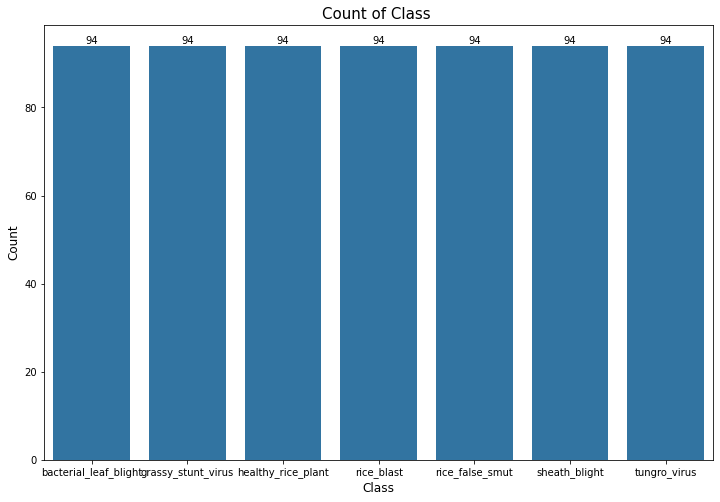

In [10]:
plt.figure(figsize=(12,8))

ax = sns.countplot(x=df['Class'],
                   order=df['Class'].value_counts(ascending=False).index);

abs_values = df['Class'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.title('Count of Class ',fontsize=15)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Count',fontsize=12)


**Histogram**

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'saturation'}>,
        <Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'dissimilarity 0'}>,
        <Axes: title={'center': 'dissimilarity 45'}>],
       [<Axes: title={'center': 'dissimilarity 90'}>,
        <Axes: title={'center': 'dissimilarity 135'}>,
        <Axes: title={'center': 'correlation 0'}>,
        <Axes: title={'center': 'correlation 45'}>,
        <Axes: title={'center': 'correlation 90'}>,
        <Axes: title={'center': 'correlation 135'}>],
       [<Axes: title={'center': 'homogeneity 0'}>,
        <Axes: title={'center': 'homogeneity 45'}>,
        <Axes: title={'center': 'homogeneity 90'}>,
        <Axes: title={'center': 'homogeneity 135'}>,
        <Axes: title={'center': 'contrast 0'}>,
        <Axes: title={'center': 'contrast 45'}>],
       [<Axes: title={'center': 'contrast 90'}>,
        <Axes: title={'center': 'contra

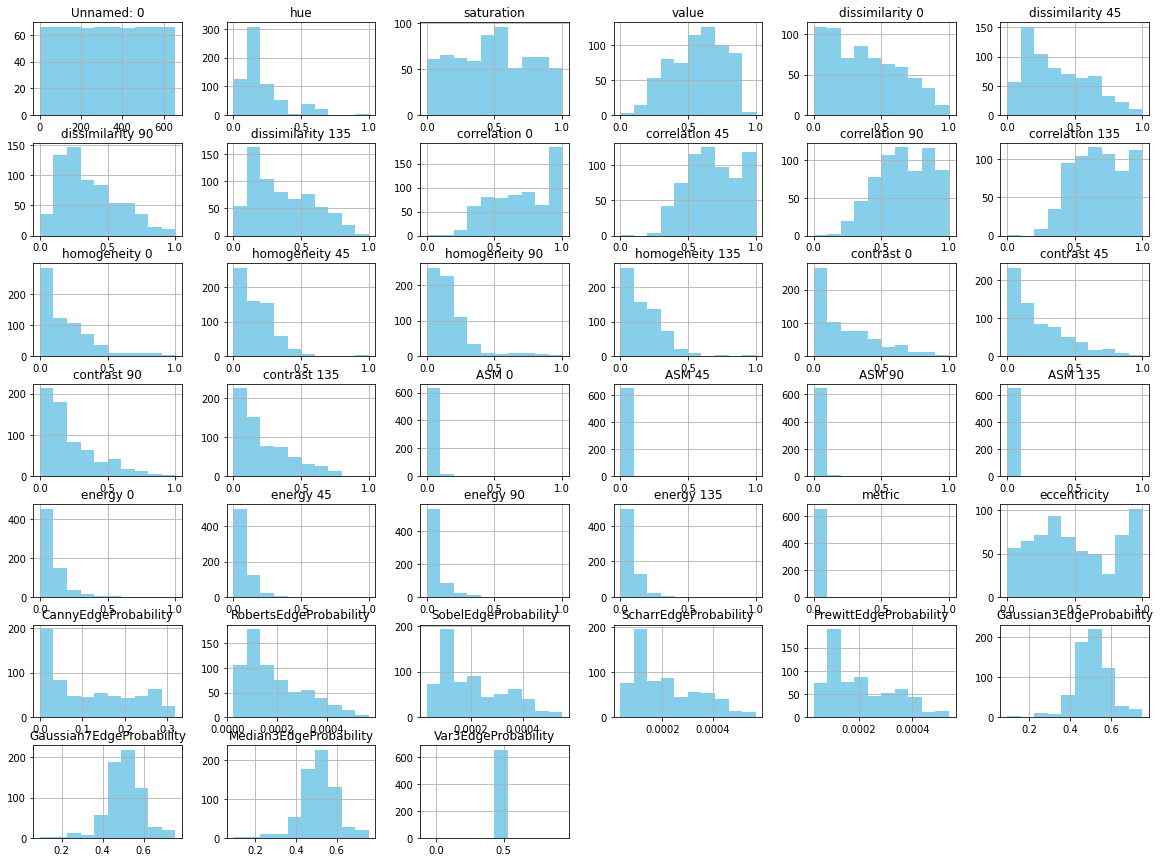

In [11]:
df.hist(figsize=(20,15),color='skyblue')

**Checking Number of Unique Values**

In [12]:
df.nunique()

Unnamed: 0                  658
File                        658
hue                         658
saturation                  658
value                       658
dissimilarity 0             658
dissimilarity 45            658
dissimilarity 90            658
dissimilarity 135           658
correlation 0               658
correlation 45              658
correlation 90              658
correlation 135             658
homogeneity 0               658
homogeneity 45              658
homogeneity 90              658
homogeneity 135             658
contrast 0                  658
contrast 45                 658
contrast 90                 658
contrast 135                658
ASM 0                       658
ASM 45                      658
ASM 90                      658
ASM 135                     658
energy 0                    658
energy 45                   658
energy 90                   658
energy 135                  658
metric                      606
eccentricity                607
Class   

In [13]:
df.head()

,Unnamed: 0,File,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,...,Image,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability,Var3EdgeProbability
0,0,bacterial_leaf_blight (1).bmp,0.147371,0.471202,0.894205,0.871268,0.846115,0.891990,0.878584,0.288803,...,bacterial_leaf_blight (1).bmp,0.291474,0.000517,0.000503,0.000522,0.000488,0.546963,0.546937,0.553215,0.431016
1,1,bacterial_leaf_blight (2).bmp,0.139568,0.622872,0.878506,0.749458,0.740327,0.691668,0.673275,0.531231,...,bacterial_leaf_blight (2).bmp,0.270309,0.000444,0.000410,0.000426,0.000399,0.538093,0.538086,0.545271,0.431016
2,2,bacterial_leaf_blight (3).bmp,0.144109,0.557113,0.843893,0.740959,0.761691,0.716523,0.712658,0.385405,...,bacterial_leaf_blight (3).bmp,0.260842,0.000429,0.000428,0.000440,0.000418,0.571981,0.571986,0.584627,0.431016
3,3,bacterial_leaf_blight (4).bmp,0.223750,0.288988,0.589557,0.795130,0.774029,0.748068,0.695174,0.425619,...,bacterial_leaf_blight (4).bmp,0.305804,0.000451,0.000445,0.000461,0.000432,0.563231,0.563249,0.569494,0.431016
4,4,bacterial_leaf_blight (5).bmp,0.163269,0.933495,0.584163,0.670450,0.599636,0.601587,0.634883,0.302146,...,bacterial_leaf_blight (5).bmp,0.271863,0.000406,0.000379,0.000394,0.000368,0.553924,0.553927,0.556922,0.431016


**Correlation**

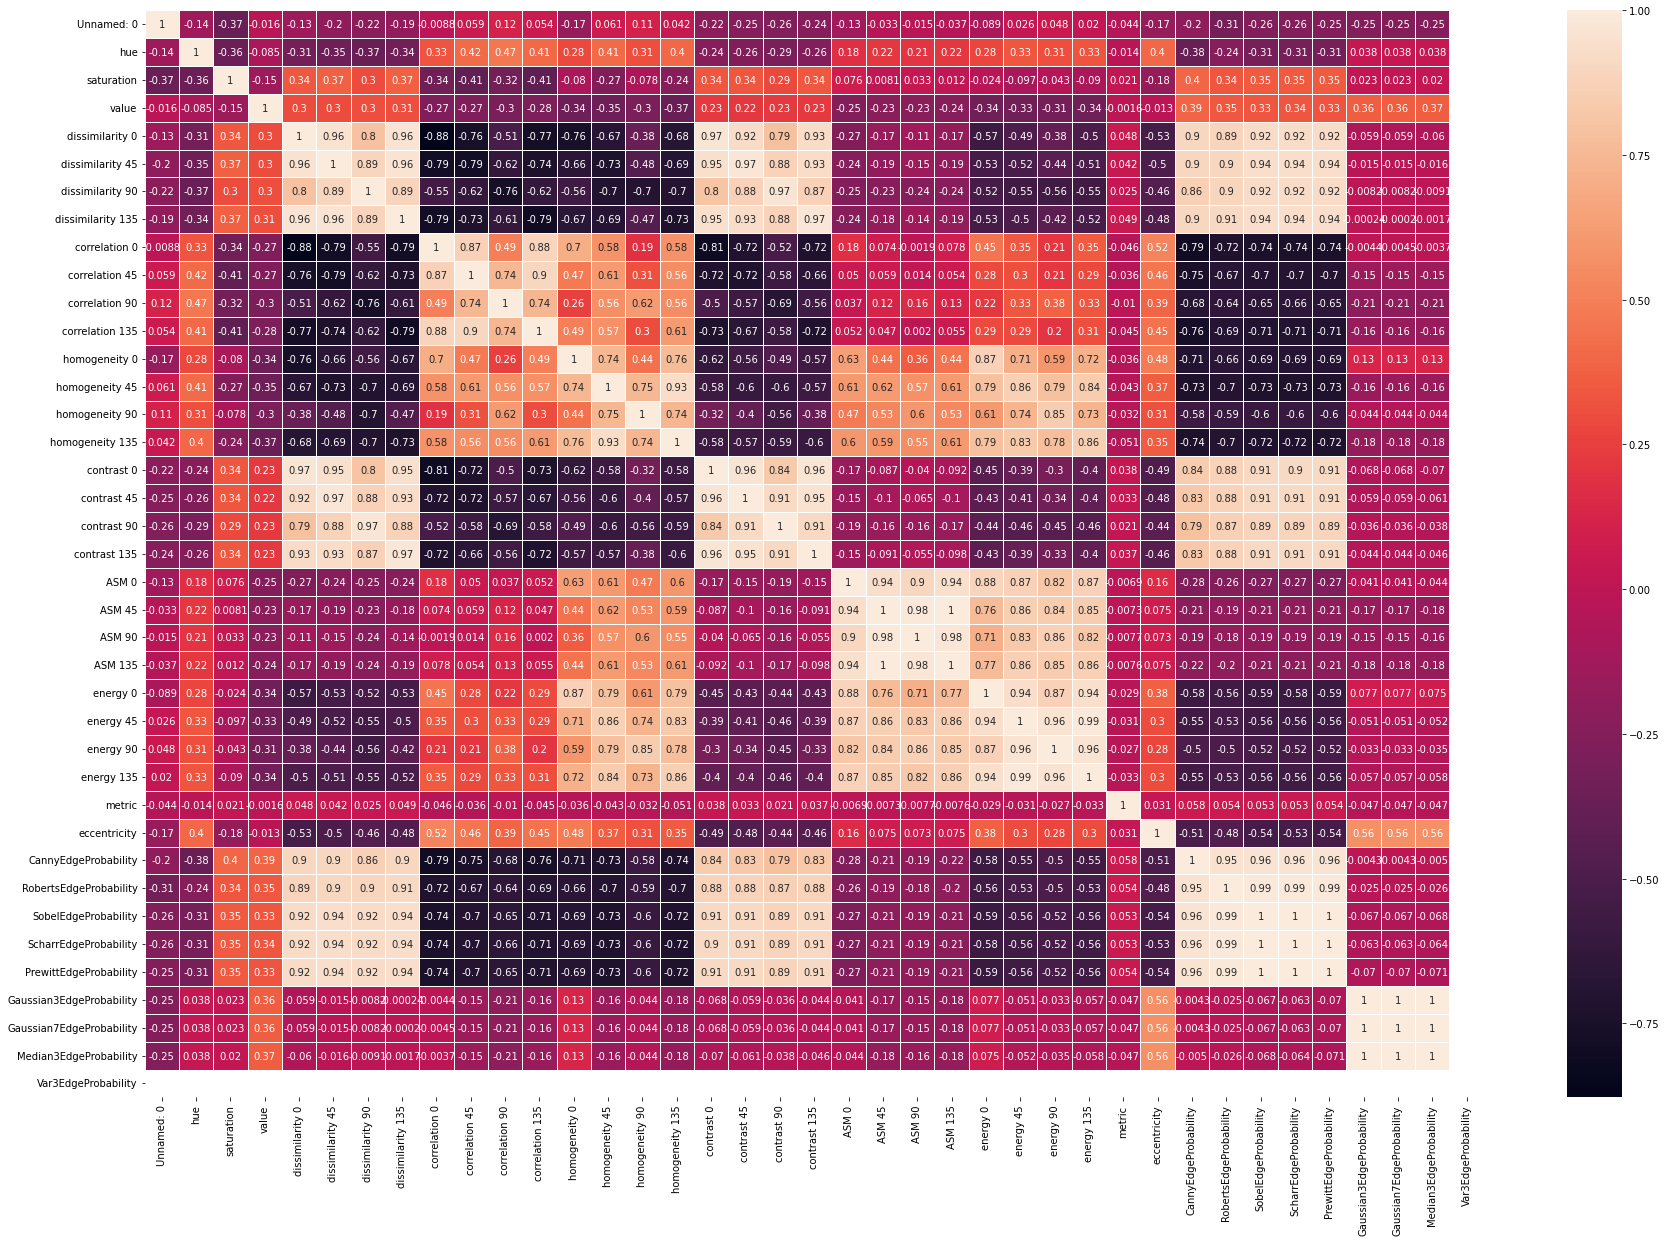

In [15]:
# heatmap

# plt.figure(figsize = (30, 20))

# corr = df.corr()

# sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
# plt.show()

plt.figure(figsize=(30, 20))
numerik_df = df.select_dtypes(include=[np.number])  # Pastikan hanya kolom numerik yang dipilih
corr = numerik_df.corr()  # Hitung korelasi

sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()

**Checking for Multicolinearity**

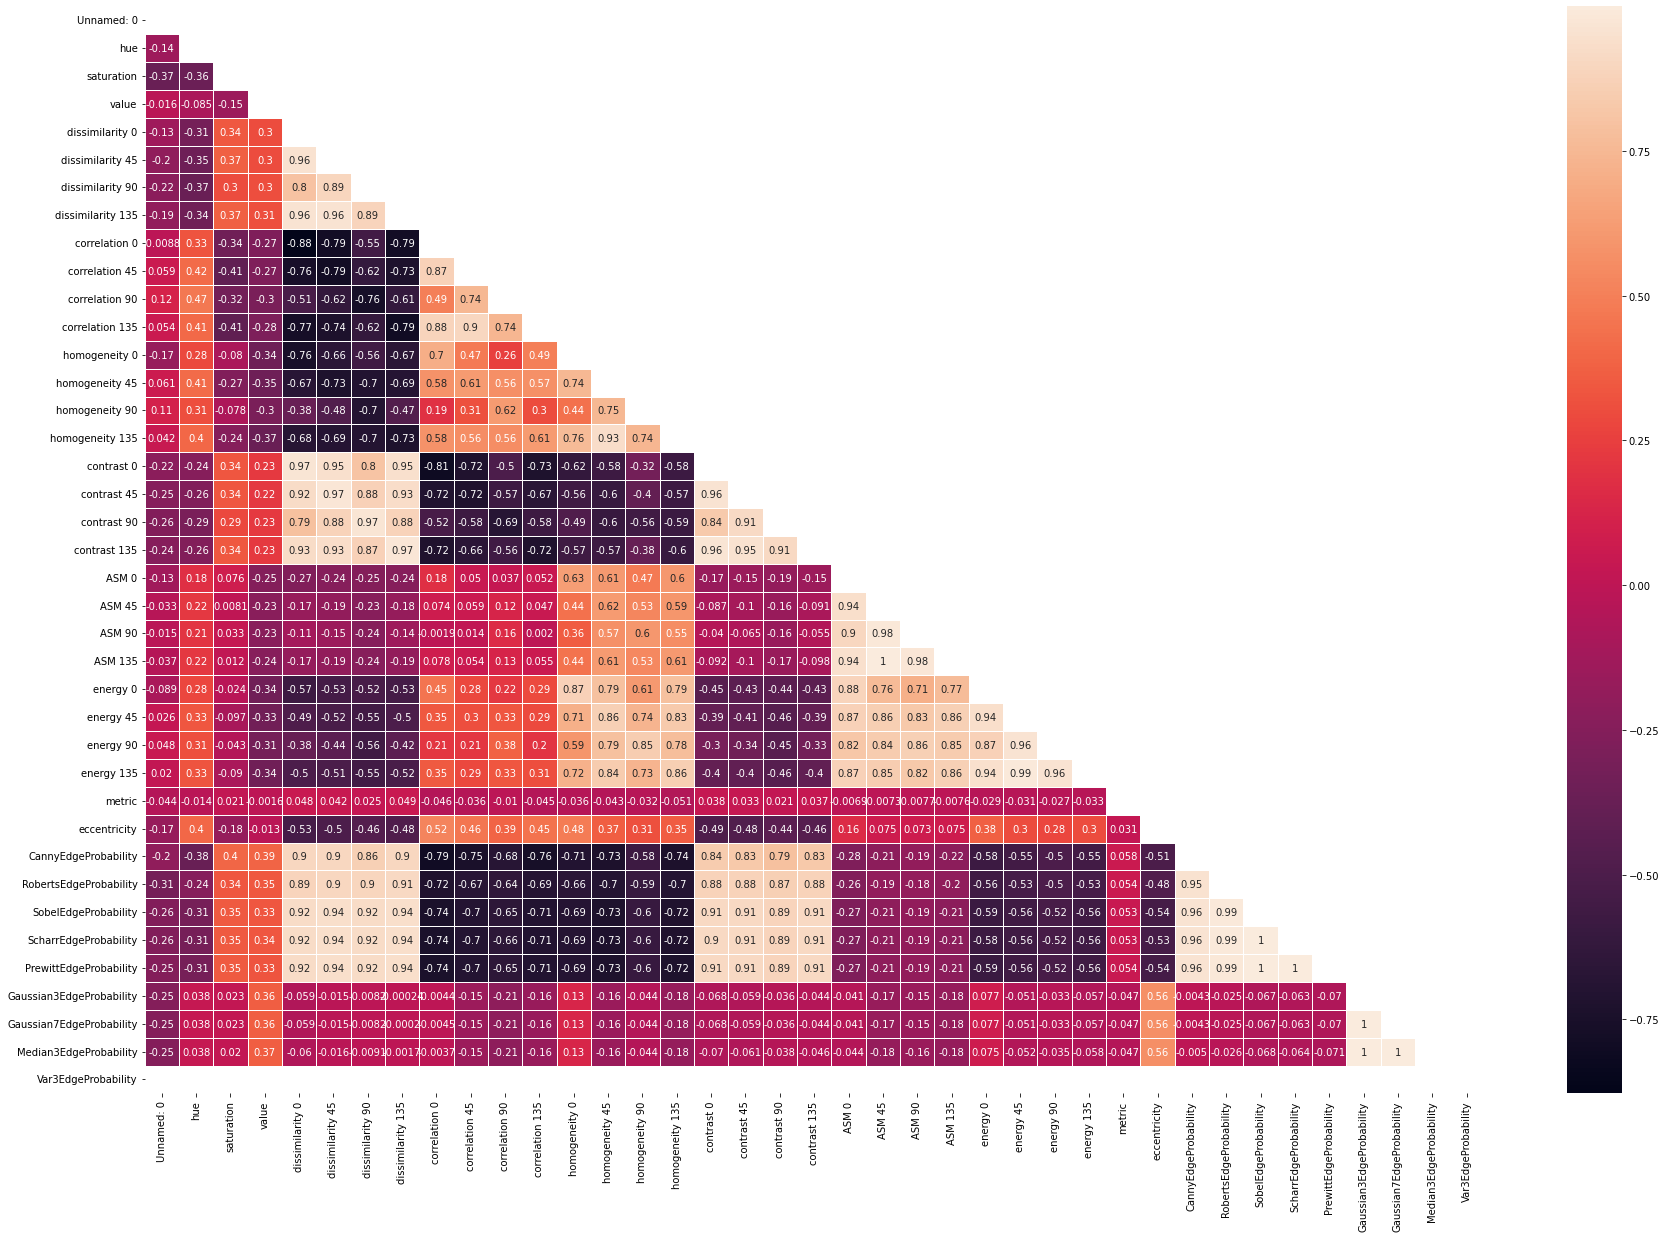

In [17]:
# checking for multicollinearity

# plt.figure(figsize = (30, 20))

# corr = df.corr()
# mask = np.triu(np.ones_like(corr, dtype = bool))

# sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
# plt.show()
# checking for multicollinearity

plt.figure(figsize = (30, 20))

# Asumsikan 'df' adalah DataFrame Anda
numerik_df = df.select_dtypes(include=[np.number])  # Hanya pilih kolom numerik
corr = numerik_df.corr()  # Hitung korelasi hanya pada kolom numerik


# corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

**Remove Unnecessary Columns**

In [18]:
df.columns

Index(['Unnamed: 0', 'File', 'hue', 'saturation', 'value', 'dissimilarity 0',
       'dissimilarity 45', 'dissimilarity 90', 'dissimilarity 135',
       'correlation 0', 'correlation 45', 'correlation 90', 'correlation 135',
       'homogeneity 0', 'homogeneity 45', 'homogeneity 90', 'homogeneity 135',
       'contrast 0', 'contrast 45', 'contrast 90', 'contrast 135', 'ASM 0',
       'ASM 45', 'ASM 90', 'ASM 135', 'energy 0', 'energy 45', 'energy 90',
       'energy 135', 'metric', 'eccentricity', 'Class', 'Image',
       'CannyEdgeProbability', 'RobertsEdgeProbability',
       'SobelEdgeProbability', 'ScharrEdgeProbability',
       'PrewittEdgeProbability', 'Gaussian3EdgeProbability',
       'Gaussian7EdgeProbability', 'Median3EdgeProbability',
       'Var3EdgeProbability'],
      dtype='object')

In [19]:
# dropping columns which are not necessary for prediction

to_drop = ['Unnamed: 0','File','Image','Var3EdgeProbability']

df.drop(to_drop, inplace = True, axis = 1)

In [20]:
df

,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,eccentricity,Class,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability
0,0.147371,0.471202,0.894205,0.871268,0.846115,0.891990,0.878584,0.288803,0.341604,0.239842,...,0.000000,bacterial_leaf_blight,0.291474,0.000517,0.000503,0.000522,0.000488,0.546963,0.546937,0.553215
1,0.139568,0.622872,0.878506,0.749458,0.740327,0.691668,0.673275,0.531231,0.533623,0.519226,...,0.525654,bacterial_leaf_blight,0.270309,0.000444,0.000410,0.000426,0.000399,0.538093,0.538086,0.545271
2,0.144109,0.557113,0.843893,0.740959,0.761691,0.716523,0.712658,0.385405,0.347422,0.327448,...,0.234866,bacterial_leaf_blight,0.260842,0.000429,0.000428,0.000440,0.000418,0.571981,0.571986,0.584627
3,0.223750,0.288988,0.589557,0.795130,0.774029,0.748068,0.695174,0.425619,0.444963,0.413981,...,0.666667,bacterial_leaf_blight,0.305804,0.000451,0.000445,0.000461,0.000432,0.563231,0.563249,0.569494
4,0.163269,0.933495,0.584163,0.670450,0.599636,0.601587,0.634883,0.302146,0.394009,0.301608,...,0.225236,bacterial_leaf_blight,0.271863,0.000406,0.000379,0.000394,0.000368,0.553924,0.553927,0.556922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,0.026343,0.111322,0.634120,0.389636,0.378798,0.431585,0.410259,0.533734,0.528227,0.407315,...,0.173460,tungro_virus,0.122050,0.000162,0.000207,0.000209,0.000205,0.497798,0.497806,0.501981
654,0.062869,0.184971,0.443993,0.325824,0.221949,0.308572,0.333640,0.595816,0.709130,0.560597,...,0.468348,tungro_virus,0.081553,0.000125,0.000156,0.000158,0.000154,0.488366,0.488363,0.492261
655,0.041468,0.235509,0.374481,0.190236,0.164595,0.141685,0.106860,0.774216,0.764194,0.832959,...,0.230690,tungro_virus,0.031130,0.000068,0.000086,0.000087,0.000086,0.438530,0.438545,0.442361
656,0.222899,0.535586,0.606740,0.213143,0.166665,0.127029,0.144491,0.724437,0.717572,0.806355,...,0.336343,tungro_virus,0.023039,0.000072,0.000092,0.000093,0.000092,0.488089,0.488077,0.491972


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hue                       658 non-null    float64
 1   saturation                658 non-null    float64
 2   value                     658 non-null    float64
 3   dissimilarity 0           658 non-null    float64
 4   dissimilarity 45          658 non-null    float64
 5   dissimilarity 90          658 non-null    float64
 6   dissimilarity 135         658 non-null    float64
 7   correlation 0             658 non-null    float64
 8   correlation 45            658 non-null    float64
 9   correlation 90            658 non-null    float64
 10  correlation 135           658 non-null    float64
 11  homogeneity 0             658 non-null    float64
 12  homogeneity 45            658 non-null    float64
 13  homogeneity 90            658 non-null    float64
 14  homogeneit

**Checking Outlier**

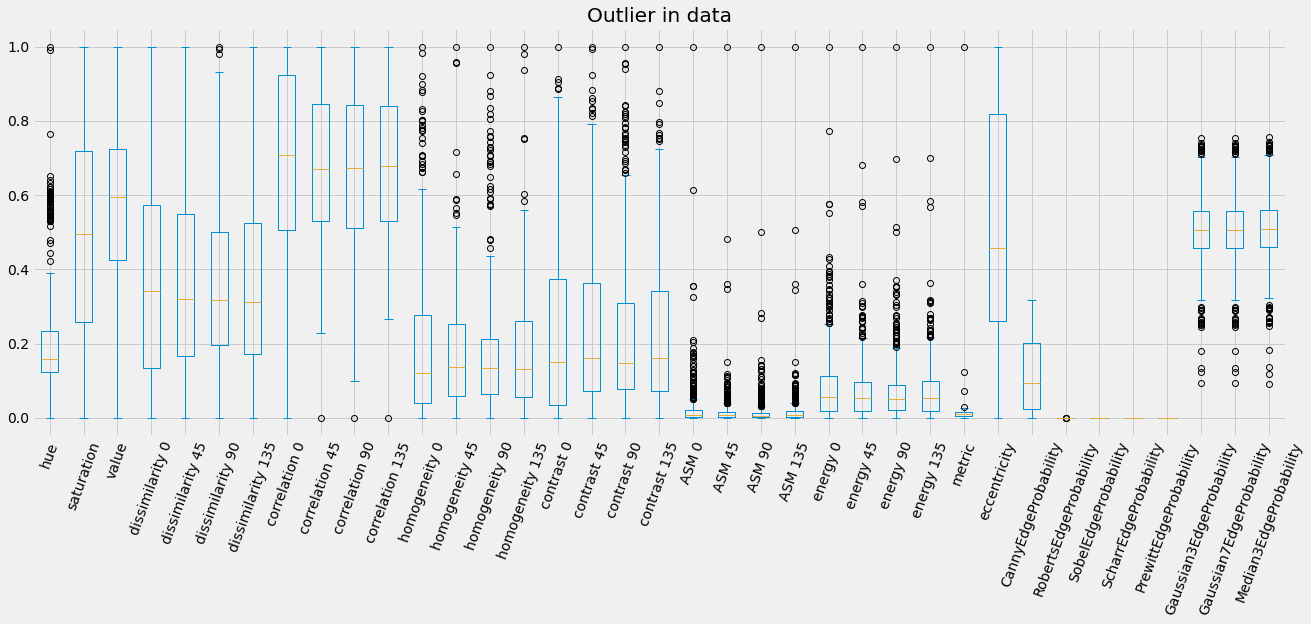

In [22]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

**Handling Outlier**

In [23]:
df.columns

Index(['hue', 'saturation', 'value', 'dissimilarity 0', 'dissimilarity 45',
       'dissimilarity 90', 'dissimilarity 135', 'correlation 0',
       'correlation 45', 'correlation 90', 'correlation 135', 'homogeneity 0',
       'homogeneity 45', 'homogeneity 90', 'homogeneity 135', 'contrast 0',
       'contrast 45', 'contrast 90', 'contrast 135', 'ASM 0', 'ASM 45',
       'ASM 90', 'ASM 135', 'energy 0', 'energy 45', 'energy 90', 'energy 135',
       'metric', 'eccentricity', 'Class', 'CannyEdgeProbability',
       'RobertsEdgeProbability', 'SobelEdgeProbability',
       'ScharrEdgeProbability', 'PrewittEdgeProbability',
       'Gaussian3EdgeProbability', 'Gaussian7EdgeProbability',
       'Median3EdgeProbability'],
      dtype='object')

In [24]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['hue','dissimilarity 90','homogeneity 0','homogeneity 45', 'homogeneity 90', 'homogeneity 135', 'contrast 0',
       'contrast 45', 'contrast 90', 'contrast 135', 'ASM 0', 'ASM 45',
       'ASM 90', 'ASM 135', 'energy 0', 'energy 45', 'energy 90', 'energy 135',
       'metric','CannyEdgeProbability','Gaussian3EdgeProbability', 'Gaussian7EdgeProbability',
       'Median3EdgeProbability']
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

**Checking Outlier After Handling**

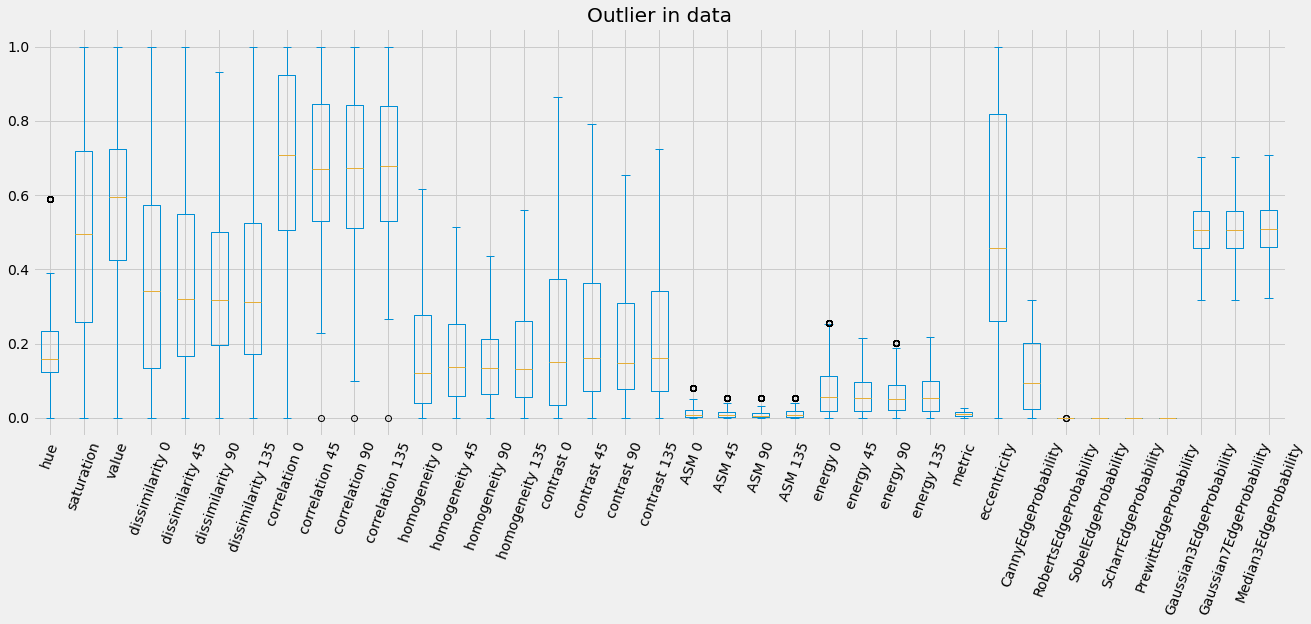

In [25]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

**Data Preprocessing**

**Encoding target columns**

In [26]:
# Define a mapping dictionary for the 'Category' column
category_mapping = {
    'bacterial_leaf_blight': 3,
    'grassy_stunt_virus': 4,
    'rice_blast': 1,
    'rice_false_smut': 6,
    'sheath_blight': 5,
    'tungro_virus': 2,
    'healthy_rice_plant': 7
}

# Map the 'Category' column to numerical values
df['Class'] = df['Class'].map(category_mapping)

**Separating the feature and target columns**




In [27]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [28]:
y.value_counts()

Class
3    94
4    94
7    94
1    94
6    94
5    94
2    94
Name: count, dtype: int64

In [29]:
y

0      3
1      3
2      3
3      3
4      3
      ..
653    2
654    2
655    2
656    2
657    2
Name: Class, Length: 658, dtype: int64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hue                       658 non-null    float64
 1   saturation                658 non-null    float64
 2   value                     658 non-null    float64
 3   dissimilarity 0           658 non-null    float64
 4   dissimilarity 45          658 non-null    float64
 5   dissimilarity 90          658 non-null    float64
 6   dissimilarity 135         658 non-null    float64
 7   correlation 0             658 non-null    float64
 8   correlation 45            658 non-null    float64
 9   correlation 90            658 non-null    float64
 10  correlation 135           658 non-null    float64
 11  homogeneity 0             658 non-null    float64
 12  homogeneity 45            658 non-null    float64
 13  homogeneity 90            658 non-null    float64
 14  homogeneit

In [31]:
X.head()

,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,metric,eccentricity,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability
0,0.147371,0.471202,0.894205,0.871268,0.846115,0.891990,0.878584,0.288803,0.341604,0.239842,...,0.018936,0.000000,0.291474,0.000517,0.000503,0.000522,0.000488,0.546963,0.546937,0.553215
1,0.139568,0.622872,0.878506,0.749458,0.740327,0.691668,0.673275,0.531231,0.533623,0.519226,...,0.015596,0.525654,0.270309,0.000444,0.000410,0.000426,0.000399,0.538093,0.538086,0.545271
2,0.144109,0.557113,0.843893,0.740959,0.761691,0.716523,0.712658,0.385405,0.347422,0.327448,...,0.016164,0.234866,0.260842,0.000429,0.000428,0.000440,0.000418,0.571981,0.571986,0.584627
3,0.223750,0.288988,0.589557,0.795130,0.774029,0.748068,0.695174,0.425619,0.444963,0.413981,...,0.025708,0.666667,0.305804,0.000451,0.000445,0.000461,0.000432,0.563231,0.563249,0.569494
4,0.163269,0.933495,0.584163,0.670450,0.599636,0.601587,0.634883,0.302146,0.394009,0.301608,...,0.017167,0.225236,0.271863,0.000406,0.000379,0.000394,0.000368,0.553924,0.553927,0.556922


**Normalization**

In [32]:
X.columns

Index(['hue', 'saturation', 'value', 'dissimilarity 0', 'dissimilarity 45',
       'dissimilarity 90', 'dissimilarity 135', 'correlation 0',
       'correlation 45', 'correlation 90', 'correlation 135', 'homogeneity 0',
       'homogeneity 45', 'homogeneity 90', 'homogeneity 135', 'contrast 0',
       'contrast 45', 'contrast 90', 'contrast 135', 'ASM 0', 'ASM 45',
       'ASM 90', 'ASM 135', 'energy 0', 'energy 45', 'energy 90', 'energy 135',
       'metric', 'eccentricity', 'CannyEdgeProbability',
       'RobertsEdgeProbability', 'SobelEdgeProbability',
       'ScharrEdgeProbability', 'PrewittEdgeProbability',
       'Gaussian3EdgeProbability', 'Gaussian7EdgeProbability',
       'Median3EdgeProbability'],
      dtype='object')

In [33]:
num_df = X

In [34]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_df)

In [35]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X.index)
scaled_num_df.head()

,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,metric,eccentricity,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability
0,0.249545,0.471202,0.894205,0.871268,0.846115,0.956998,0.878584,0.288803,0.341604,0.239842,...,0.736594,0.000000,0.916009,0.904291,0.906420,0.908622,0.905186,0.592568,0.592481,0.598579
1,0.236334,0.622872,0.878506,0.749458,0.740327,0.742077,0.673275,0.531231,0.533623,0.519226,...,0.606679,0.525654,0.849493,0.770436,0.728647,0.731426,0.728137,0.569589,0.569551,0.578006
2,0.244022,0.557113,0.843893,0.740959,0.761691,0.768743,0.712658,0.385405,0.347422,0.327448,...,0.628748,0.234866,0.819742,0.742160,0.762196,0.757850,0.766580,0.657379,0.657372,0.679935
3,0.378881,0.288988,0.589557,0.795130,0.774029,0.802588,0.695174,0.425619,0.444963,0.413981,...,1.000000,0.666667,0.961042,0.783102,0.795206,0.796378,0.792943,0.634713,0.634738,0.640742
4,0.276467,0.933495,0.584163,0.670450,0.599636,0.645430,0.634883,0.302146,0.394009,0.301608,...,0.667777,0.225236,0.854378,0.699897,0.668003,0.670727,0.666676,0.610601,0.610588,0.608181


In [36]:
X.drop(columns = scaled_num_df.columns, inplace = True)

In [37]:
X = pd.concat([scaled_num_df, X], axis = 1)

In [38]:
X.head()

,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,metric,eccentricity,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability
0,0.249545,0.471202,0.894205,0.871268,0.846115,0.956998,0.878584,0.288803,0.341604,0.239842,...,0.736594,0.000000,0.916009,0.904291,0.906420,0.908622,0.905186,0.592568,0.592481,0.598579
1,0.236334,0.622872,0.878506,0.749458,0.740327,0.742077,0.673275,0.531231,0.533623,0.519226,...,0.606679,0.525654,0.849493,0.770436,0.728647,0.731426,0.728137,0.569589,0.569551,0.578006
2,0.244022,0.557113,0.843893,0.740959,0.761691,0.768743,0.712658,0.385405,0.347422,0.327448,...,0.628748,0.234866,0.819742,0.742160,0.762196,0.757850,0.766580,0.657379,0.657372,0.679935
3,0.378881,0.288988,0.589557,0.795130,0.774029,0.802588,0.695174,0.425619,0.444963,0.413981,...,1.000000,0.666667,0.961042,0.783102,0.795206,0.796378,0.792943,0.634713,0.634738,0.640742
4,0.276467,0.933495,0.584163,0.670450,0.599636,0.645430,0.634883,0.302146,0.394009,0.301608,...,0.667777,0.225236,0.854378,0.699897,0.668003,0.670727,0.666676,0.610601,0.610588,0.608181


In [39]:
X

,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,metric,eccentricity,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability
0,0.249545,0.471202,0.894205,0.871268,0.846115,0.956998,0.878584,0.288803,0.341604,0.239842,...,0.736594,0.000000,0.916009,0.904291,0.906420,0.908622,0.905186,0.592568,0.592481,0.598579
1,0.236334,0.622872,0.878506,0.749458,0.740327,0.742077,0.673275,0.531231,0.533623,0.519226,...,0.606679,0.525654,0.849493,0.770436,0.728647,0.731426,0.728137,0.569589,0.569551,0.578006
2,0.244022,0.557113,0.843893,0.740959,0.761691,0.768743,0.712658,0.385405,0.347422,0.327448,...,0.628748,0.234866,0.819742,0.742160,0.762196,0.757850,0.766580,0.657379,0.657372,0.679935
3,0.378881,0.288988,0.589557,0.795130,0.774029,0.802588,0.695174,0.425619,0.444963,0.413981,...,1.000000,0.666667,0.961042,0.783102,0.795206,0.796378,0.792943,0.634713,0.634738,0.640742
4,0.276467,0.933495,0.584163,0.670450,0.599636,0.645430,0.634883,0.302146,0.394009,0.301608,...,0.667777,0.225236,0.854378,0.699897,0.668003,0.670727,0.666676,0.610601,0.610588,0.608181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,0.044607,0.111322,0.634120,0.389636,0.378798,0.463039,0.410259,0.533734,0.528227,0.407315,...,0.495172,0.173460,0.383565,0.251536,0.337498,0.328286,0.343356,0.465199,0.465204,0.465886
654,0.106458,0.184971,0.443993,0.325824,0.221949,0.331061,0.333640,0.595816,0.709130,0.560597,...,0.629068,0.468348,0.256295,0.184360,0.238696,0.233502,0.241688,0.440765,0.440742,0.440710
655,0.070218,0.235509,0.374481,0.190236,0.164595,0.152011,0.106860,0.774216,0.764194,0.832959,...,0.287582,0.230690,0.097833,0.079336,0.105006,0.102234,0.106918,0.311658,0.311684,0.311473
656,0.377439,0.535586,0.606740,0.213143,0.166665,0.136287,0.144491,0.724437,0.717572,0.806355,...,0.225336,0.336343,0.072404,0.086296,0.116366,0.112889,0.118833,0.440046,0.440000,0.439962


C:\Users\ayynu\AppData\Local\Temp\ipykernel_21464\1681007545.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
C:\Users\ayynu\AppData\Local\Temp\ipykernel_21464\1681007545.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
C:\Users\ayynu\AppData\Local\Temp\ipykernel_21464\1681

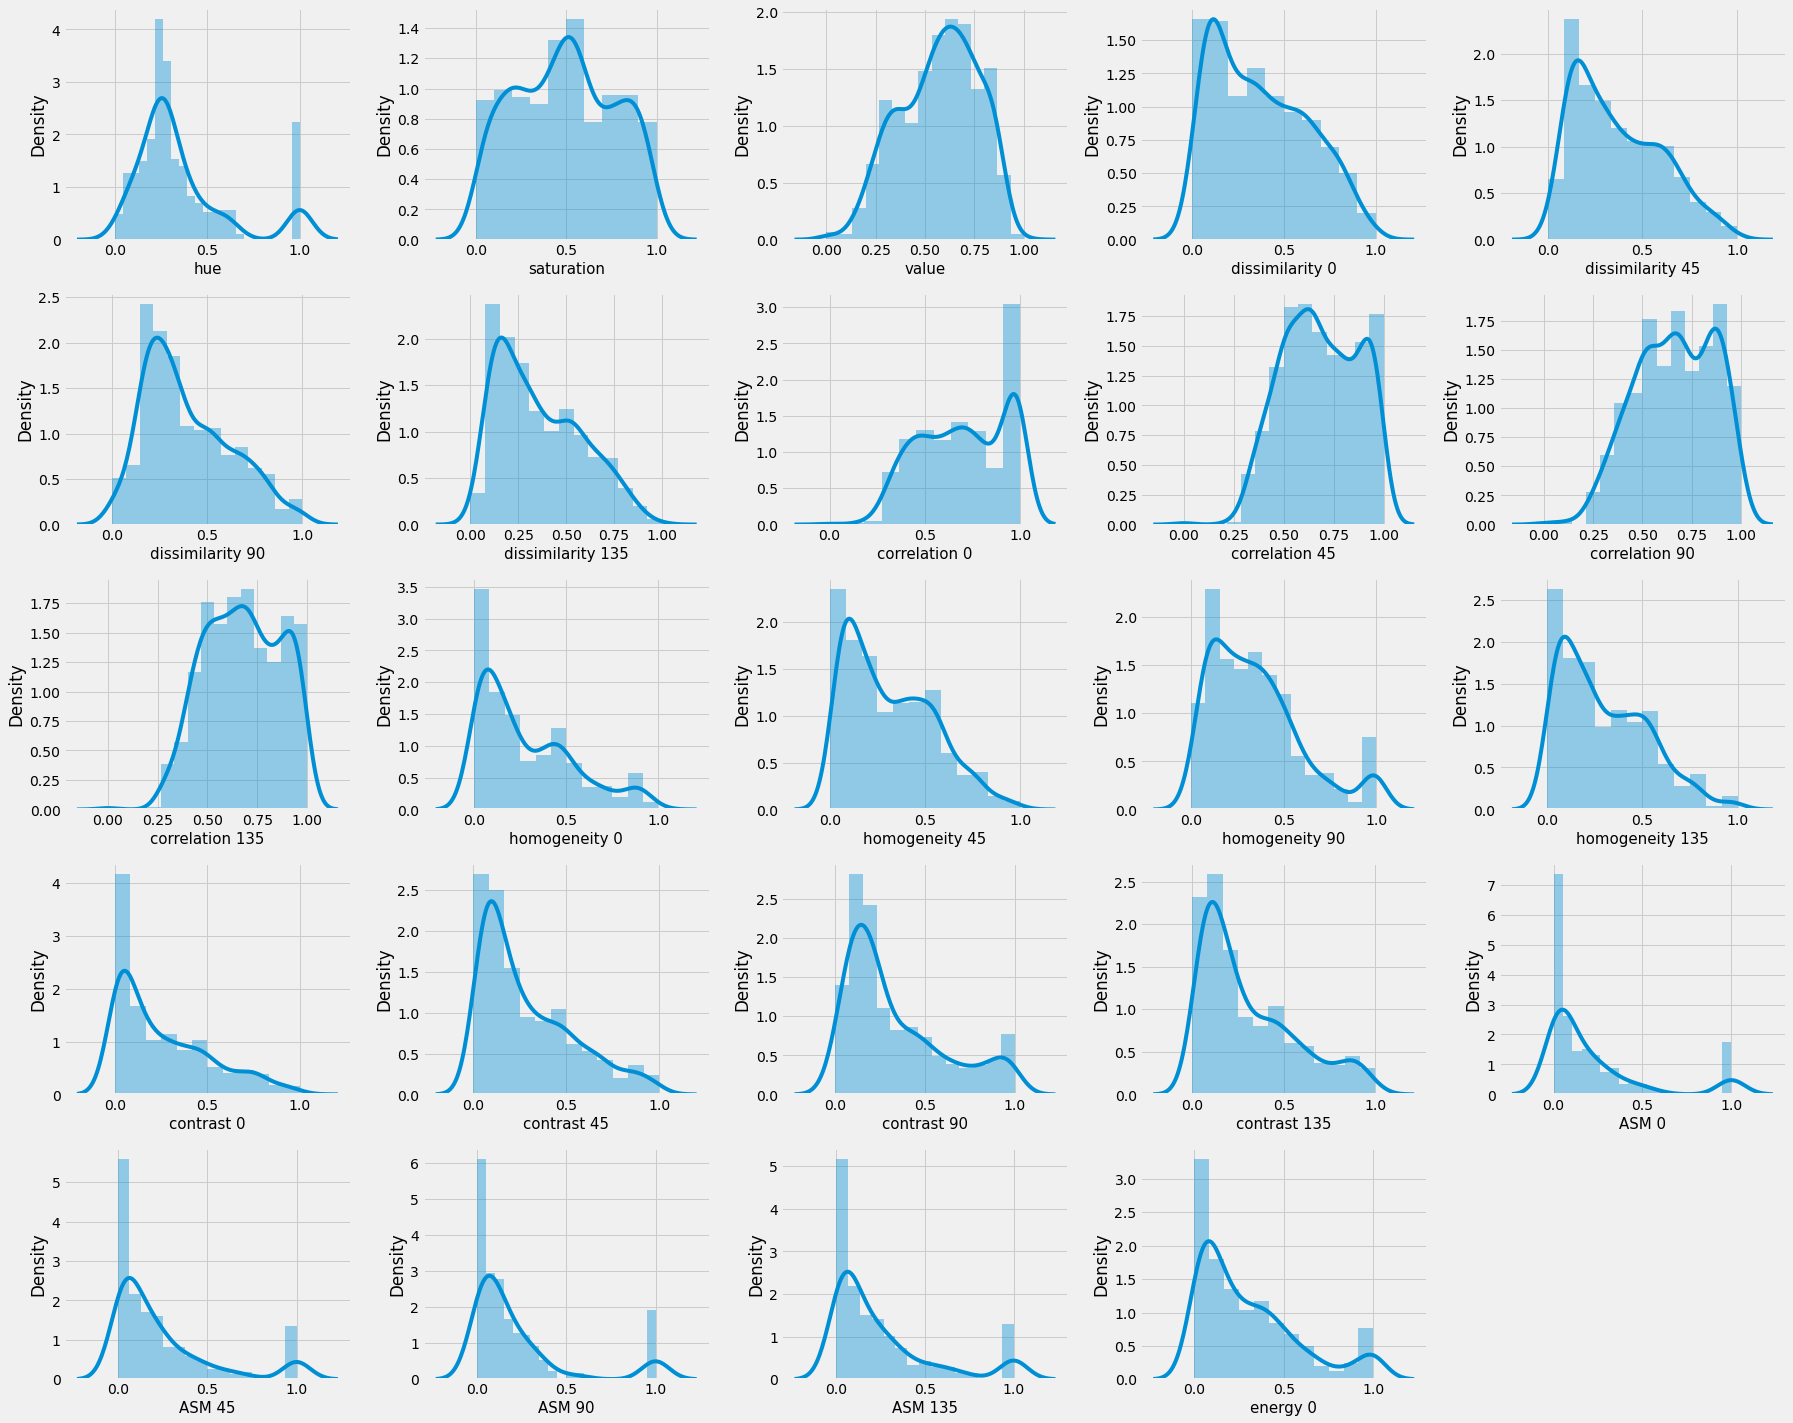

In [40]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Data looks good




**Split Dataset**

In [41]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
X_train

,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,metric,eccentricity,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability
15,0.304660,0.779585,0.648362,0.807080,0.762628,0.794312,0.730900,0.381385,0.439354,0.422545,...,0.736594,0.000000,0.987473,0.867202,0.820740,0.826281,0.818192,0.549110,0.549086,0.554842
627,0.247457,0.237501,0.599523,0.404830,0.300746,0.375433,0.368870,0.454953,0.590487,0.523623,...,0.392045,0.081575,0.589503,0.323699,0.362372,0.360177,0.360655,0.562269,0.562237,0.561717
588,0.443952,0.426940,0.667959,0.196029,0.218543,0.231666,0.120009,0.737149,0.610120,0.673290,...,0.300355,0.578403,0.065577,0.098098,0.135662,0.131920,0.138034,0.456706,0.456685,0.456846
478,1.000000,0.061887,0.580705,0.083189,0.071547,0.157207,0.081095,0.969745,0.935837,0.870511,...,0.204235,0.649575,0.016473,0.203297,0.139518,0.137568,0.141038,0.410330,0.410318,0.410876
512,0.371881,0.869900,0.428089,0.347380,0.276571,0.094581,0.256392,0.673188,0.741341,0.955229,...,0.736594,0.000000,0.168984,0.136709,0.184178,0.178189,0.188689,0.272105,0.272087,0.272130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.239762,0.645169,0.608316,0.341912,0.362050,0.524243,0.417694,0.716266,0.648436,0.427657,...,0.200682,0.703818,0.455656,0.306743,0.337136,0.334351,0.338129,0.604918,0.604895,0.601800
425,0.144570,0.308104,0.772858,0.376774,0.322169,0.380643,0.365398,0.720920,0.748097,0.679463,...,0.275494,0.571540,0.434361,0.269376,0.323239,0.317997,0.325556,0.645463,0.645456,0.645214
378,0.156684,0.607160,0.644740,0.359992,0.499904,0.619291,0.437075,0.792281,0.619717,0.508999,...,0.385828,0.070174,0.375360,0.307523,0.388355,0.379601,0.393907,0.508243,0.508229,0.510528
562,1.000000,0.079346,0.630675,0.077076,0.087005,0.155065,0.078389,0.976785,0.914404,0.853831,...,0.241807,0.699332,0.026995,0.177691,0.127024,0.125191,0.128175,0.380698,0.380683,0.381172


In [43]:
y_train

15     3
627    2
588    2
478    5
512    5
      ..
423    6
425    6
378    6
562    5
84     3
Name: Class, Length: 526, dtype: int64

In [44]:
y_train2 = pd.DataFrame(y_train)
y_train2

,Class
15,3
627,2
588,2
478,5
512,5
...,...
423,6
425,6
378,6
562,5


In [45]:
X_test

,hue,saturation,value,dissimilarity 0,dissimilarity 45,dissimilarity 90,dissimilarity 135,correlation 0,correlation 45,correlation 90,...,metric,eccentricity,CannyEdgeProbability,RobertsEdgeProbability,SobelEdgeProbability,ScharrEdgeProbability,PrewittEdgeProbability,Gaussian3EdgeProbability,Gaussian7EdgeProbability,Median3EdgeProbability
302,0.239721,0.932895,0.307302,0.717569,0.630048,0.659111,0.683006,0.567485,0.629922,0.605392,...,0.461805,0.142553,0.632720,0.502420,0.617472,0.605633,0.624057,0.293178,0.293193,0.288014
250,0.263965,0.936306,0.727915,0.668796,0.622727,0.527087,0.525736,0.343535,0.391633,0.532031,...,0.436825,0.253257,0.782601,0.532461,0.590553,0.582169,0.595088,0.583243,0.583252,0.583340
584,0.027067,0.189562,0.426947,0.194982,0.225128,0.225595,0.095691,0.770973,0.631220,0.675978,...,0.478266,0.367824,0.117750,0.096536,0.129497,0.126483,0.131254,0.305276,0.305251,0.304961
71,0.192880,0.807005,0.548736,0.035846,0.330065,0.458408,0.312282,0.988508,0.563404,0.338314,...,0.179381,0.872492,0.142177,0.104120,0.129473,0.124988,0.132976,0.879219,0.879156,0.881171
289,0.240854,0.928095,0.668389,0.629394,0.594988,0.507020,0.509666,0.291790,0.334881,0.475934,...,0.322487,0.195551,0.732369,0.506806,0.562264,0.556253,0.564400,0.637089,0.637077,0.641904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.164041,0.354274,0.650477,0.347669,0.309149,0.368257,0.339589,0.608690,0.615815,0.510243,...,0.186374,0.352325,0.354128,0.245830,0.302224,0.296860,0.304879,0.551308,0.551282,0.550658
265,0.357192,0.845542,0.211372,0.690512,0.571356,0.643318,0.662940,0.661053,0.747507,0.676946,...,0.733354,0.164673,0.693975,0.482528,0.600963,0.589532,0.606612,0.261756,0.261734,0.259835
641,0.046148,0.183632,0.633845,0.160163,0.147516,0.221128,0.174768,0.784959,0.739733,0.598371,...,0.178809,0.451598,0.080609,0.102442,0.132067,0.128588,0.134394,0.459208,0.459237,0.459252
188,0.231937,0.614314,0.717538,0.731833,0.654286,0.468694,0.641930,0.496942,0.558155,0.736314,...,0.381721,0.427657,0.742327,0.568276,0.630761,0.618238,0.639774,0.457229,0.457226,0.455880


In [46]:
y_test

302    1
250    7
584    2
71     3
289    1
      ..
408    6
265    7
641    2
188    7
610    2
Name: Class, Length: 132, dtype: int64

In [47]:
y_test2 = pd.DataFrame(y_test)
y_test2

,Class
302,1
250,7
584,2
71,3
289,1
...,...
408,6
265,7
641,2
188,7


**SMO**

In [ ]:
pip install python-spidermonkey

: 

In [49]:
import spidermonkey as smo

# 4. Definisikan fungsi objektif untuk SMO
def objective_function(positions):
    selected_features = [i for i, position in enumerate(positions) if position >= 0.5]
    if not selected_features:
        return 0.0  # Jika tidak ada fitur yang dipilih, kembalikan akurasi 0.

    # Latih model Random Forest dengan fitur yang dipilih
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train.iloc[:, selected_features], y_train)

    # Lakukan prediksi dan hitung akurasi
    y_pred = rf_classifier.predict(X_test.iloc[:, selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Kita akan mencari minimum, jadi akurasi akan diubah menjadi negatif.

# 5. Konfigurasi algoritma SMO
num_agents = 20
num_iterations = 50
num_features = X_train.shape[1]
smo_optimizer = smo.SMO(num_agents=num_agents, num_iterations=num_iterations, num_features=num_features)

# 6. Jalankan optimisasi fitur dengan SMO
best_solution = smo_optimizer.optimize(objective_function)

# 7. Pilih fitur terbaik berdasarkan solusi terbaik
selected_features = [i for i, position in enumerate(best_solution) if position >= 0.5]

# 8. Latih model Random Forest dengan fitur terbaik
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train.iloc[:, selected_features], y_train)

# 9. Evaluasi kinerja model dengan fitur terbaik
y_pred = rf_classifier.predict(X_test.iloc[:, selected_features])
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model Random Forest dengan Fitur Terbaik:", accuracy)

AttributeError: module 'os' has no attribute 'uname'

**Modeling**

**1. Random Forest Classifier Classifier**

In [46]:
clf1 = RandomForestClassifier(random_state=42)
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [47]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs.best_params_

g:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
108 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "g:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "g:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "g:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "g:\Anaconda\lib\site-packages\sklearn\

{'classifier': RandomForestClassifier(max_depth=10, n_estimators=250, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 250}

In [48]:
rfc = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=250,class_weight=None)

start = time.time()
rfc.fit(X_train, y_train)
stop = time.time()

print(f"Start time: {start} s")
print(f"Stop time: {stop} s")
print(f"Training time: {stop - start} s")



Start time: 1696834528.8977125 s
Stop time: 1696834529.8986764 s
Training time: 1.0009639263153076 s


In [49]:
y_pred1 = rfc.predict(X_test)

In [50]:
# Test data performance
print("Accuracy:",accuracy_score(y_test, y_pred1))
#print("Sensitivity:",recall_score(y_test, y_pred1))
#print("Specificity:",specificity_score(y_test, y_pred1))
#print("Precision:",precision_score(y_test, y_pred1))
#print("F1-Score:",f1_score(y_test, y_pred1))
#print("AUC:",roc_auc_score(y_test, y_pred1))

Accuracy: 0.8181818181818182


In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Assuming y_pred1 contains your multiclass predictions and y_test contains the true labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Multiclass confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Sensitivity (Recall) for each class
recall = recall_score(y_test, y_pred1, average=None)
print("Recall for each class:", recall)

# Specificity for each class (only works if your problem allows defining a positive class)
# specificity = specificity_score(y_test, y_pred1, average=None)
# print("Specificity for each class:", specificity)

# Precision for each class
precision = precision_score(y_test, y_pred1, average=None)
print("Precision for each class:", precision)

# F1-Score for each class
f1 = f1_score(y_test, y_pred1, average=None)
print("F1-Score for each class:", f1)

Accuracy: 0.8181818181818182
Recall for each class: [0.57692308 0.96       0.66666667 0.86666667 1.         0.91666667
 0.8       ]
Precision for each class: [0.88235294 0.96       0.71428571 0.86666667 0.9047619  0.57894737
 0.76190476]
F1-Score for each class: [0.69767442 0.96       0.68965517 0.86666667 0.95       0.70967742
 0.7804878 ]


In [52]:
# accuracy_score, confusion_matrix and classification_report

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred1)

print(f"Training accuracy of Support Vector Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {rfc_test_acc}")

print(metrics.confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Training accuracy of Support Vector Classifier is : 0.9980988593155894
Test accuracy of Support Vector Classifier is : 0.8181818181818182
[[15  1  1  1  1  5  2]
 [ 0 24  0  0  0  1  0]
 [ 0  0 10  0  1  1  3]
 [ 1  0  0 13  0  1  0]
 [ 0  0  0  0 19  0  0]
 [ 0  0  0  1  0 11  0]
 [ 1  0  3  0  0  0 16]]
              precision    recall  f1-score   support

           1       0.88      0.58      0.70        26
           2       0.96      0.96      0.96        25
           3       0.71      0.67      0.69        15
           4       0.87      0.87      0.87        15
           5       0.90      1.00      0.95        19
           6       0.58      0.92      0.71        12
           7       0.76      0.80      0.78        20

    accuracy                           0.82       132
   macro avg       0.81      0.83      0.81       132
weighted avg       0.83      0.82      0.82       132



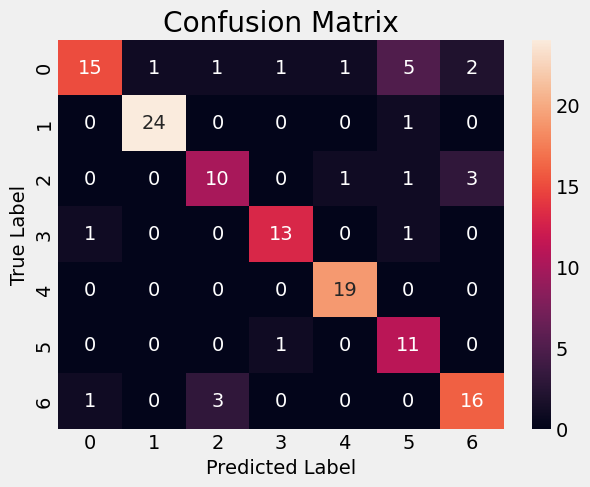

In [53]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)

sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


g:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


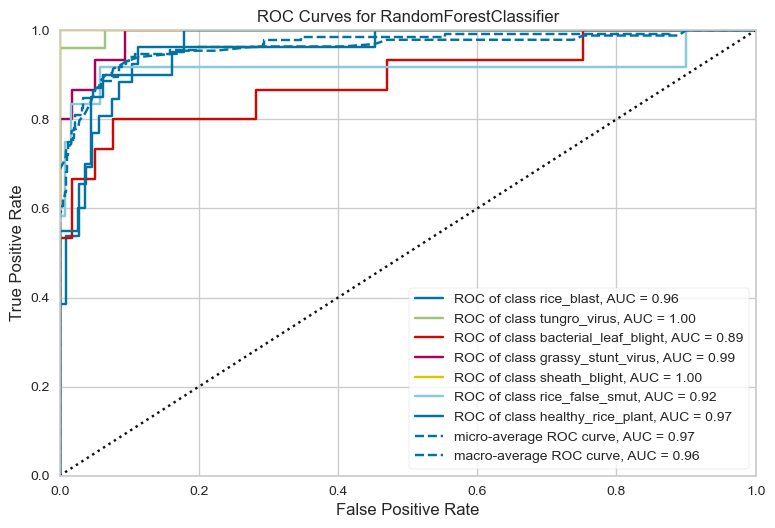

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={1: 'rice_blast', 2: 'tungro_virus', 3: 'bacterial_leaf_blight',
                4: 'grassy_stunt_virus', 5: 'sheath_blight',
                6: 'rice_false_smut', 7: 'healthy_rice_plant'},
       estimator=RandomForestClassifier(max_depth=10, n_estimators=250,
                                        random_state=42))

In [55]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, X_train, y_train, X_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={3: 'bacterial_leaf_blight', 
                                        4: 'grassy_stunt_virus',
                                        1: 'rice_blast',
                                        6: 'rice_false_smut',
                                        5: 'sheath_blight',
                                        2: 'tungro_virus',
                                        7: 'healthy_rice_plant'})

    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer
plot_ROC_curve(rfc, X_train, y_train, X_test, y_test)